In [5]:
from Basics import *
setplot(dark=True)

from cobaya.samplers.mcmc import plot_progress
from cobaya.model import get_model
from cobaya.yaml import yaml_load_file
from cobaya.run import run

In [6]:
model = get_model("/global/homes/c/cpopik/Capybara/runchains.yaml")

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']


Loading Data
Loading Cosmology functions
Loading SHMR
Loading Galaxy Distributions
Loading HMF
Loading HOD
Loading Average Functions
Loading Projection Functions
Initializing Model


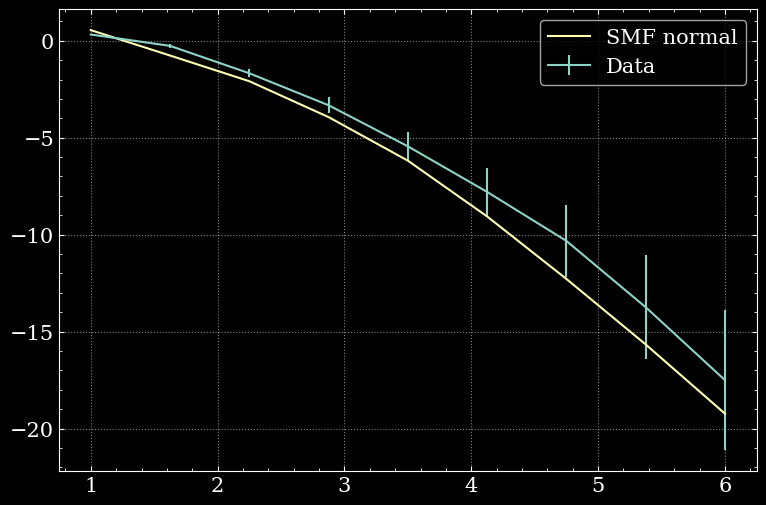

In [7]:
likeli = model.likelihood['tsztest']

plt.errorbar(likeli.meas.thetas, likeli.meas.tSZdata, np.diag(likeli.meas.tSZcov)**0.5, label='Data')

plt.plot(likeli.meas.thetas,
         likeli.sign(likeli.proj(likeli.ave_SMF(likeli.pth_1h()+likeli.pth_2h())))+likeli.meas.dustprof, label='SMF normal')


# proj2 = ForwardModel.project_Hankel(likeli.rs, likeli.meas.thetas, likeli.dA_func(0.55), likeli.meas.beam_data, likeli.meas.beam_ells, likeli.meas.resp_data, likeli.meas.resp_ells)

# plt.plot(likeli.meas.thetas,
#          likeli.sign(proj2(likeli.ave_SMF(likeli.pth_1h()*0.8+likeli.pth_2h())))+likeli.meas.dustprof, label='SMF change')

plt.legend()

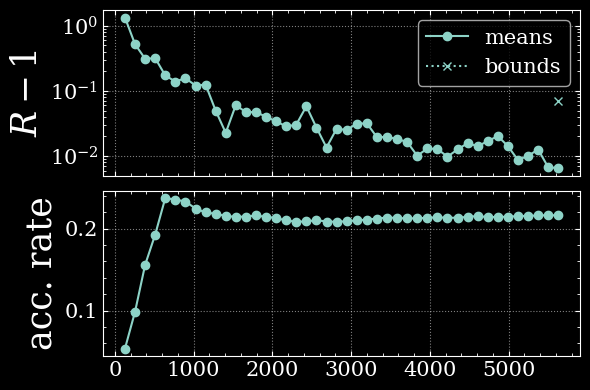

Index(['weight', 'minuslogpost', 'P0', 'alpha_t', 'beta_t', 'A2h_t',
       'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__tsztest'],
      dtype='object')

In [8]:
results = pd.DataFrame(np.genfromtxt("/global/homes/c/cpopik/Capybara/chains/cobaya_TEST_0.001.1.txt", names=True).T)

plot_progress("chains/cobaya_TEST_0.001", figure_kwargs={"figsize": (6,4)})

plt.tight_layout()
plt.show()

results.columns

In [9]:
info_from_yaml = yaml_load_file("/global/homes/c/cpopik/Capybara/runchains.yaml")

(7040, 10)

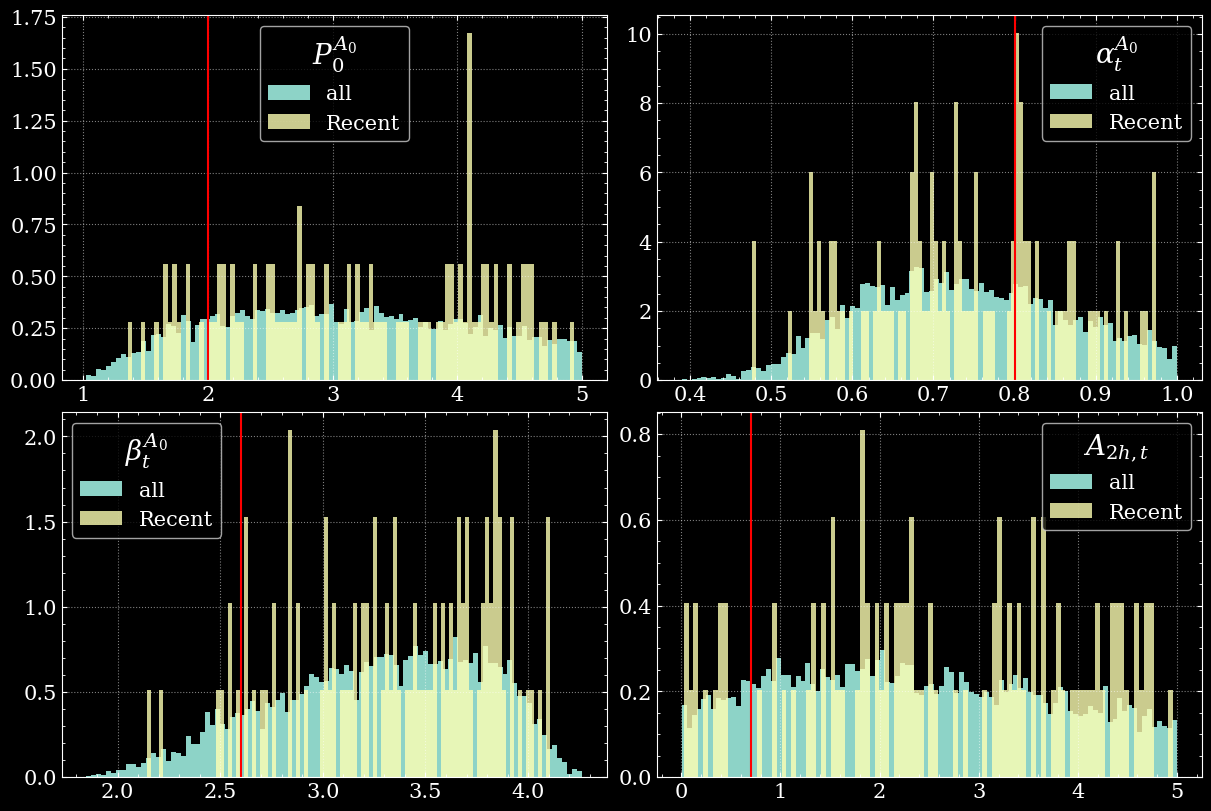

In [15]:
fitpars = [k for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v]
fitparslab = [rf"${v['latex']}$" for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v]
guessparsvals = [v['ref'] for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v]

fig, axs = plt.subplots(2, 2, figsize=(12, 8), layout='constrained')
for ax, param, pstr, pval in zip(axs.flatten(), fitpars, fitparslab, guessparsvals):
    ax.hist(results[param], 100, density=True, label='all')
    ax.hist(results[param][-100::], 100, density=True, alpha=0.8, label='Recent')
    ax.axvline(pval, c='r')
    ax.legend(title=pstr)

results.shape

INFO:output:Output to be read-from/written-into folder 'chains', with prefix 'cobaya_TEST_0.001'


[output] Output to be read-from/written-into folder 'chains', with prefix 'cobaya_TEST_0.001'


INFO:output:Found existing info files with the requested output prefix: 'chains/cobaya_TEST_0.001'


[output] Found existing info files with the requested output prefix: 'chains/cobaya_TEST_0.001'


INFO:output:Will delete previous products ('force' was requested).


[output] Will delete previous products ('force' was requested).
Loading Data
Loading Cosmology functions
Loading SHMR
Loading Galaxy Distributions
Loading HMF
Loading HOD
Loading Average Functions
Loading Projection Functions
Initializing Model


INFO:minimize:Initializing


[minimize] Initializing


INFO:samplecollection:Loaded 7040 sample points from 'chains/cobaya_TEST_0.001.1.txt'


[samplecollection] Loaded 7040 sample points from 'chains/cobaya_TEST_0.001.1.txt'


INFO:minimize:Run 1/2 will start from MAP of previous sample:


[minimize] Run 1/2 will start from MAP of previous sample:


INFO:minimize:{'P0': 1.4825955, 'alpha_t': 0.92939015, 'beta_t': 2.3031532, 'A2h_t': 1.7926047}


[minimize] {'P0': 1.4825955, 'alpha_t': 0.92939015, 'beta_t': 2.3031532, 'A2h_t': 1.7926047}


INFO:minimize:Run 2/2 will start from random initial point:


[minimize] Run 2/2 will start from random initial point:


INFO:minimize:{'P0': 2.0, 'alpha_t': 0.8, 'beta_t': 2.6, 'A2h_t': 0.7}


[minimize] {'P0': 2.0, 'alpha_t': 0.8, 'beta_t': 2.6, 'A2h_t': 0.7}


INFO:minimize:Covariance matrix from previous sample.


[minimize] Covariance matrix from previous sample.


INFO:minimize:Starting run 1/2


[minimize] Starting run 1/2


INFO:minimize:Run 1/2 converged.


[minimize] Run 1/2 converged.


INFO:minimize:Starting run 2/2


[minimize] Starting run 2/2


INFO:minimize:Run 2/2 converged.


[minimize] Run 2/2 converged.


INFO:minimize:Finished successfully!


[minimize] Finished successfully!


INFO:minimize:-log(posterior) minimized to 5.69338


[minimize] -log(posterior) minimized to 5.69338


INFO:minimize:Parameter values at minimum:
   weight  minuslogpost        P0   alpha_t    beta_t     A2h_t  minuslogprior  minuslogprior__0      chi2  chi2__tsztest
0     1.0      5.693378  1.442681  0.991571  2.290206  2.795595       5.087596          5.087596  1.211564       1.211564


[minimize] Parameter values at minimum:
   weight  minuslogpost        P0   alpha_t    beta_t     A2h_t  minuslogprior  minuslogprior__0      chi2  chi2__tsztest
0     1.0      5.693378  1.442681  0.991571  2.290206  2.795595       5.087596          5.087596  1.211564       1.211564


INFO:minimize:Full set of minima:
{'0': (5.693378135965265, True), '1': (5.711319618043559, True)}


[minimize] Full set of minima:
{'0': (5.693378135965265, True), '1': (5.711319618043559, True)}


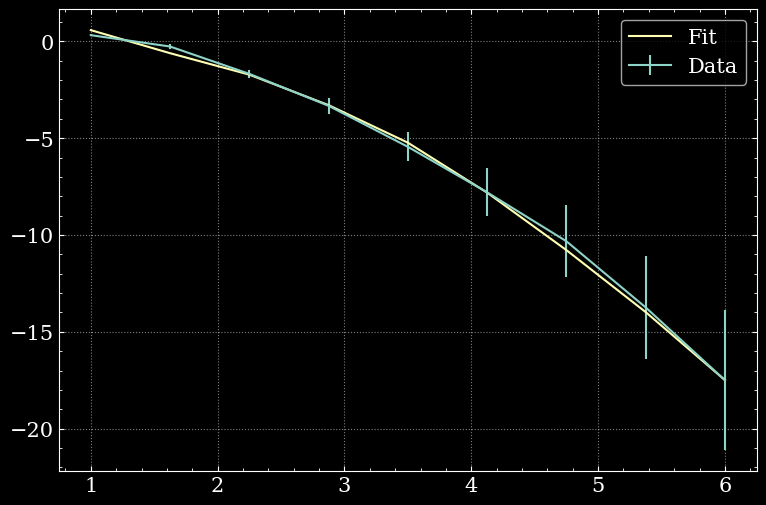

In [11]:
updated_info_minimizer, minimizer = run(info_from_yaml, minimize=True, force=True)
minimum = minimizer.products()["minimum"]

fitparsmark = {k: minimum[k] for k, v in info_from_yaml['params'].items() if isinstance(v, dict) and "prior" in v}

plt.errorbar(likeli.meas.thetas, likeli.meas.tSZdata, np.diag(likeli.meas.tSZcov)**0.5, label='Data')
# plt.plot(likeli.meas.thetas, likeli._get_theory(model.initpar), label='Guess')
plt.plot(likeli.meas.thetas, likeli._get_theory(dict(minimum.MAP())), label='Fit')
plt.legend()

In [12]:
import getdist.plots as gdplt
%matplotlib inline

In [14]:
os.path.split(os.path.abspath(info_from_yaml["output"]))

('/global/u2/c/cpopik/Capybara/chains', 'cobaya_TEST_0.001')

[root] *WARNING* outlier fraction 0.0004261363636363636 


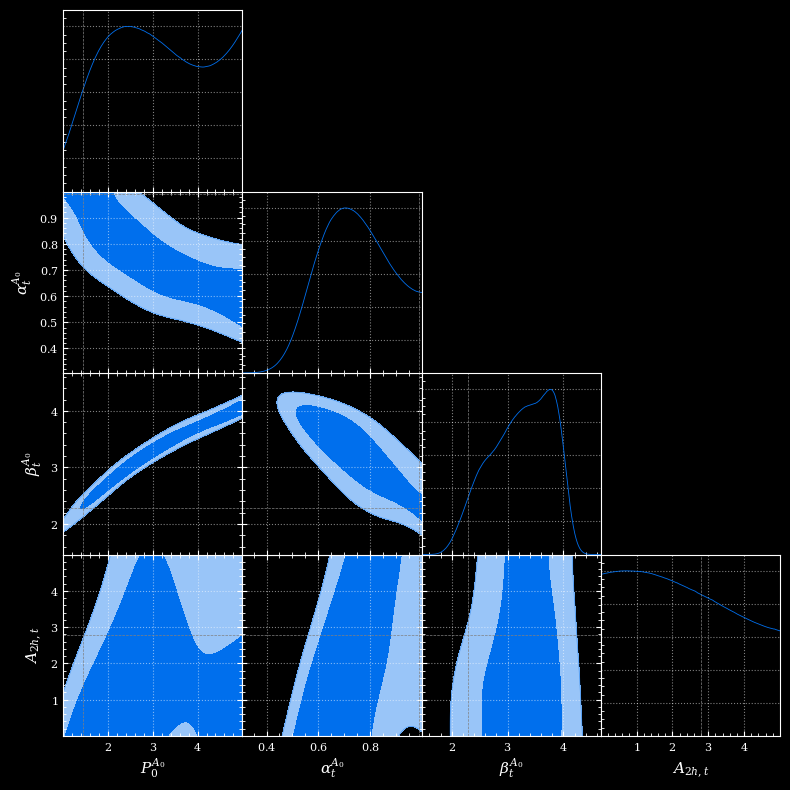

In [13]:
folder,name = os.path.split(os.path.abspath(info_from_yaml["output"]))
gdplot = gdplt.get_subplot_plotter(chain_dir=folder)
gdplot.settings.title_limit_fontsize=14

gdplot.triangle_plot(name, labels = fitparslab, params = fitpars, markers=fitparsmark, filled=True)
plt.savefig('cobaya_TEST.png',bbox_inches='tight')